# Scoring ,visualisation and ensemble method notebook
Author : Hakim CHEKIROU

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from scipy.ndimage.filters import gaussian_filter1d

# Alexnet

In [8]:
data = pd.read_csv("best_predictions/AlexNet_no_augmentation.csv")
print(classification_report(data.Target, data.predicted))
print("AUC score ")
roc_auc_score(data.Target, data.predicted)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2055
           1       0.62      0.65      0.64       614

    accuracy                           0.83      2669
   macro avg       0.76      0.77      0.76      2669
weighted avg       0.83      0.83      0.83      2669

AUC score 


0.766449907669385

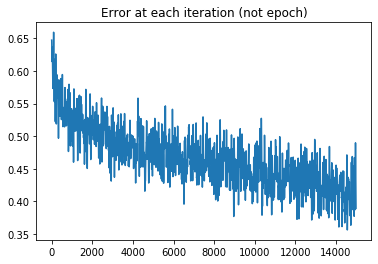

In [11]:
with open('losses/AlexNet_no_augmentation.npy', 'rb') as f:
    losses = np.load(f)
ysmoothed = gaussian_filter1d(losses[30:], sigma=6)
plt.plot(ysmoothed)
plt.title("Error at each iteration (not epoch)")
plt.show()

# Inception V3
## without filpping

In [12]:
data = pd.read_csv("best_predictions/inception_v3_balanced.csv")
print(classification_report(data.Target, data.predicted))
print("AUC score ")
roc_auc_score(data.Target, data.predicted)

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2055
           1       0.56      0.66      0.61       614

    accuracy                           0.80      2669
   macro avg       0.73      0.75      0.74      2669
weighted avg       0.82      0.80      0.81      2669

AUC score 


0.7528444169698123

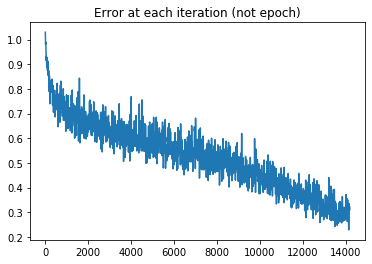

In [15]:
with open('losses/inception_v3_balanced.npy', 'rb') as f:
    losses = np.load(f)
ysmoothed = gaussian_filter1d(losses, sigma=4)
plt.plot(ysmoothed)
plt.title("Error at each iteration (not epoch)")
plt.show()

## with horizontal flipping

In [14]:
data = pd.read_csv("best_predictions/inception_v3_horizontal_flip.csv")
print(classification_report(data.Target, data.predicted))
print("AUC score ")
roc_auc_score(data.Target, data.predicted)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      2055
           1       0.58      0.73      0.65       614

    accuracy                           0.82      2669
   macro avg       0.75      0.79      0.76      2669
weighted avg       0.84      0.82      0.82      2669

AUC score 


0.7864008496001648

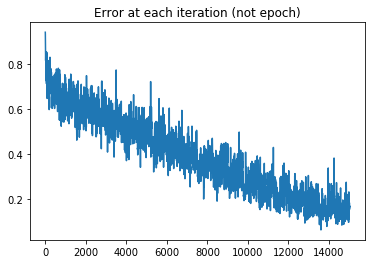

In [16]:
with open('losses/inception_v3_horizontal_flip.npy', 'rb') as f:
    losses = np.load(f)
ysmoothed = gaussian_filter1d(losses, sigma=3)
plt.plot(ysmoothed)
plt.title("Error at each iteration (not epoch)")
plt.show()

# Resnet 50

In [17]:
data_50 = pd.read_csv("best_predictions/resnet50.csv")
print(classification_report(data_50.Target, data_50.predicted))
print("AUC score ")
roc_auc_score(data_50.Target, data_50.predicted)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2055
           1       0.60      0.67      0.63       614

    accuracy                           0.82      2669
   macro avg       0.75      0.77      0.76      2669
weighted avg       0.83      0.82      0.83      2669

AUC score 


0.7684260998438701

# Resnet 18

In [18]:
data = pd.read_csv("predictions/resnet18_balanced.csv")
data = data[data.patientId.isin(data_50.patientId)]
print(classification_report(data.Target, data.predicted))
print("AUC score ")
roc_auc_score(data.Target, data.predicted)

              precision    recall  f1-score   support

           0       0.94      0.75      0.84      2055
           1       0.50      0.84      0.63       614

    accuracy                           0.77      2669
   macro avg       0.72      0.80      0.73      2669
weighted avg       0.84      0.77      0.79      2669

AUC score 


0.7971654897485281

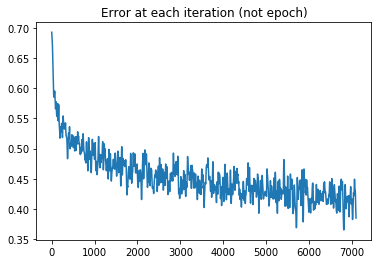

In [19]:
with open('losses/resnet18_balanced.npy', 'rb') as f:
    losses = np.load(f)
#plt.plot(losses)

ysmoothed = gaussian_filter1d(losses, sigma=6)
plt.plot(ysmoothed)
plt.title("Error at each iteration (not epoch)")
plt.show()

# Transformers
## Transformer with 64 patches and CLS token

In [97]:
data = pd.read_csv("best_predictions/ViT_adam.csv")
print(classification_report(data.Target, data.predicted))
print("AUC score ")
roc_auc_score(data.Target, data.predicted)

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      2055
           1       0.49      0.31      0.38       614

    accuracy                           0.77      2669
   macro avg       0.65      0.61      0.62      2669
weighted avg       0.74      0.77      0.75      2669

AUC score 


0.6060613265492126

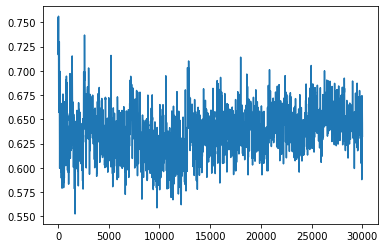

In [37]:
with open('losses/ViT.npy', 'rb') as f:
    losses = np.load(f)

ysmoothed = gaussian_filter1d(losses[30:], sigma=6)
plt.plot(ysmoothed)
plt.show()

## Transformer with 256 patches and mean pooling

In [85]:
data = pd.read_csv("predictions/ViT_mean.csv)
print(classification_report(data.Target, data.predicted))
print("AUC score ")
roc_auc_score(data.Target, data.predicted)

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      2055
           1       0.46      0.70      0.55       614

    accuracy                           0.74      2669
   macro avg       0.67      0.73      0.68      2669
weighted avg       0.79      0.74      0.75      2669

AUC score 


0.725102039198903

# visualizing the attention weights

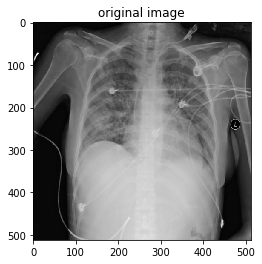

Text(0.5, 1.0, 'attention weights')

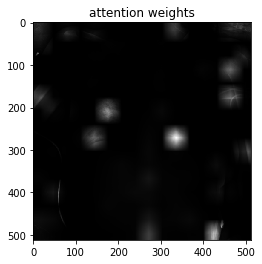

In [21]:
with open('image_original_3.npy', 'rb') as f:
    image_origi = np.load(f)
plt.imshow(image_origi[:,:,0], cmap="gray")
plt.title("original image")
plt.show()
with open('image_3.npy', 'rb') as f:
    att = np.load(f)
plt.imshow(att[:,:,0], cmap="gray")
plt.title("attention weights")

# Ensemble model

In [24]:
# read all the predicitons

data_alex = pd.read_csv("best_predictions/AlexNet_no_augmentation.csv")
data_alex.set_index("patientId", inplace= True)
f1_alex = [0.89, 0.64] 

data = pd.read_csv("predictions/resnet18_balanced.csv")
data_resnet18 = data[data.patientId.isin(data_alex.index)]
data_resnet18.set_index("patientId", inplace= True)
f1_resnet18 = [0.84, 0.63]

data_inception = pd.read_csv("best_predictions/inception_v3_horizontal_flip.csv")
data_inception.set_index("patientId", inplace= True)
f1_inception = [0.88, 0.65]

data_50 = pd.read_csv("best_predictions/resnet50.csv")
data_50.set_index("patientId", inplace= True)
f1_50 = [0.88, 0.63]

data_vit = pd.read_csv("predictions/ViT_mean.csv")
data_vit.set_index("patientId", inplace= True)
f1_vit = [0.82, 0.55]


In [25]:
# the new prediction
data = data_vit.copy()
data["predicted"] = data["predicted"].astype(float)

## Simple mean 

In [26]:
data["predicted"]=(data_resnet18["predicted"].values
                   + data_alex["predicted"].values 
                   + 1*data_inception["predicted"].values 
                   + data_50["predicted"].values 
                   + data_vit["predicted"].values)/5

In [27]:
data["predicted"] = data["predicted"].apply(lambda x : 1. if x >= 0.4 else 0.).astype(int)

In [28]:
print(classification_report(data.Target, data.predicted))
print("AUC score ")
roc_auc_score(data.Target, data.predicted)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      2055
           1       0.50      0.81      0.62       614

    accuracy                           0.77      2669
   macro avg       0.71      0.78      0.73      2669
weighted avg       0.83      0.77      0.79      2669

AUC score 


0.783227529581461

## Weighted average (best)

In [43]:
# the new prediction
data = data_vit.copy()
data["predicted"] = data["predicted"].astype(float)

In [44]:
for i, row in data.iterrows():
    poids= 0
    weight = 10
    poids += weight
    guess = data_resnet18.loc[i].predicted * weight
    
    weight = 3
    poids += weight
    guess += data_alex.loc[i].predicted * weight
    
    weight = 5
    poids += weight
    guess += data_inception.loc[i].predicted * weight
    
    weight = 3
    poids += weight
    guess += data_50.loc[i].predicted * weight
    
    weight = 2
    poids += weight
    guess += data_vit.loc[i].predicted * weight
    
    data.at[i, "predicted"] = guess / poids # ponderation

In [45]:
data["predicted"] = data["predicted"].apply(lambda x : 1. if x >= 0.5 else 0.).astype(int)
print(classification_report(data.Target, data.predicted))
print("AUC score ")
roc_auc_score(data.Target, data.predicted)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      2055
           1       0.54      0.81      0.65       614

    accuracy                           0.80      2669
   macro avg       0.74      0.80      0.75      2669
weighted avg       0.84      0.80      0.81      2669

AUC score 


0.8034320835017477

In [48]:
data.to_csv("best_predictions/ensemble.csv")